In [1]:
!pip install hmmlearn

In [2]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
from hmmlearn import hmm
from collections import defaultdict
%matplotlib inline

Загрузим тома книги

In [3]:
wp_p1 = pd.read_csv(r'C:\Users\79169\Desktop\tom_1.txt', sep="\t", header=None, encoding='utf-8')

wp_p1

,0
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 1
4,* * *
...,...
3156,"«Хорошо бы это было, – подумал князь Андрей, в..."
3157,Носилки тронулись. При каждом толчке он опять ...
3158,Тихая жизнь и спокойное семейное счастие в Лыс...
3159,"– C'est un sujet nerveux et bilieux, – сказал ..."


In [4]:
wp_p2 = pd.read_csv(r'C:\Users\79169\Desktop\tom_2.txt', sep="\t", header=None, encoding='utf-8')
wp_p2

,0
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 2
4,* * *
...,...
2958,"Как и в первом томе, в число вариантов не вклю..."
2959,1) различия в форме собственных имен: Nicolas ...
2960,2) Очевидные опечатки разных изданий; но если ...
2961,3) Мелкие случаи грамматических и орфографичес...


In [5]:
wp_p3 = pd.read_csv(r'C:\Users\79169\Desktop\tom_3.txt', sep="\t", header=None, encoding='utf-8')
wp_p3

,0
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 3
4,* * *
...,...
2926,"– Куда же это ведут тебя, голубчик ты мой? – с..."
2927,– Qu'est ce qu'elle veut cette femme? [Чего ей...
2928,Пьер был как пьяный. Восторженное состояние ег...
2929,– Ce qu'elle dit? – проговорил он. – Elle m'ap...


In [6]:
wp_p4 = pd.read_csv(r'C:\Users\79169\Desktop\tom_4.txt', sep="\t", header=None, encoding='utf-8')
wp_p4

,0
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 4
4,* * *
...,...
2556,Точно так же теперь кажется: стоит только приз...
2557,"Точно так же теперь, как Вольтер в свое время,..."
2558,"Как в вопросе астрономии тогда, как и теперь в..."
2559,Как для астрономии трудность признания движени...


Соединим их в один датафрейм

In [7]:
wp_f = pd.concat([wp_p1, wp_p2, wp_p3, wp_p4]).reset_index()
wp_f = wp_f.drop(['index'], axis=True)
wp_f

,0
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 1
4,* * *
...,...
11611,Точно так же теперь кажется: стоит только приз...
11612,"Точно так же теперь, как Вольтер в свое время,..."
11613,"Как в вопросе астрономии тогда, как и теперь в..."
11614,Как для астрономии трудность признания движени...


Переименуем колонку и почистим текст

In [8]:
wp_f.columns = ['Text']
wp_f

,Text
0,Annotation
1,Лев Толстой
2,Война и Мир
3,Том 1
4,* * *
...,...
11611,Точно так же теперь кажется: стоит только приз...
11612,"Точно так же теперь, как Вольтер в свое время,..."
11613,"Как в вопросе астрономии тогда, как и теперь в..."
11614,Как для астрономии трудность признания движени...


In [9]:
wp_f['Text'] = wp_f['Text'].str.lower()
wp_f['Text'] = wp_f['Text'].str.replace(r'[^а-яА-Я\s]', '')
wp_f

C:\Users\79169\AppData\Local\Temp\ipykernel_46912\3204469457.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  wp_f['Text'] = wp_f['Text'].str.replace(r'[^а-яА-Я\s]', '')


,Text
0,
1,лев толстой
2,война и мир
3,том
4,
...,...
11611,точно так же теперь кажется стоит только призн...
11612,точно так же теперь как вольтер в свое время н...
11613,как в вопросе астрономии тогда как и теперь в ...
11614,как для астрономии трудность признания движени...


In [10]:
wp_f = wp_f[wp_f['Text'].str.strip() != '']
wp_f

,Text
1,лев толстой
2,война и мир
3,том
5,том часть первая
33,часть орая
...,...
11611,точно так же теперь кажется стоит только призн...
11612,точно так же теперь как вольтер в свое время н...
11613,как в вопросе астрономии тогда как и теперь в ...
11614,как для астрономии трудность признания движени...


Соединим все в одну строку и посчитаем вероятности встречи букв

In [19]:
war_peace = ''.join(wp_f['Text'])


In [12]:
russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

In [13]:
POS = {l: i for i, l in enumerate(russian)}

In [14]:
probabilities = np.zeros((len(russian), len(russian)))

In [15]:
for cp, cn in zip(war_peace[:-1], war_peace[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [16]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

C:\Users\79169\AppData\Local\Temp\ipykernel_46912\2743358628.py:1: RuntimeWarning: invalid value encountered in divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [17]:
df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))

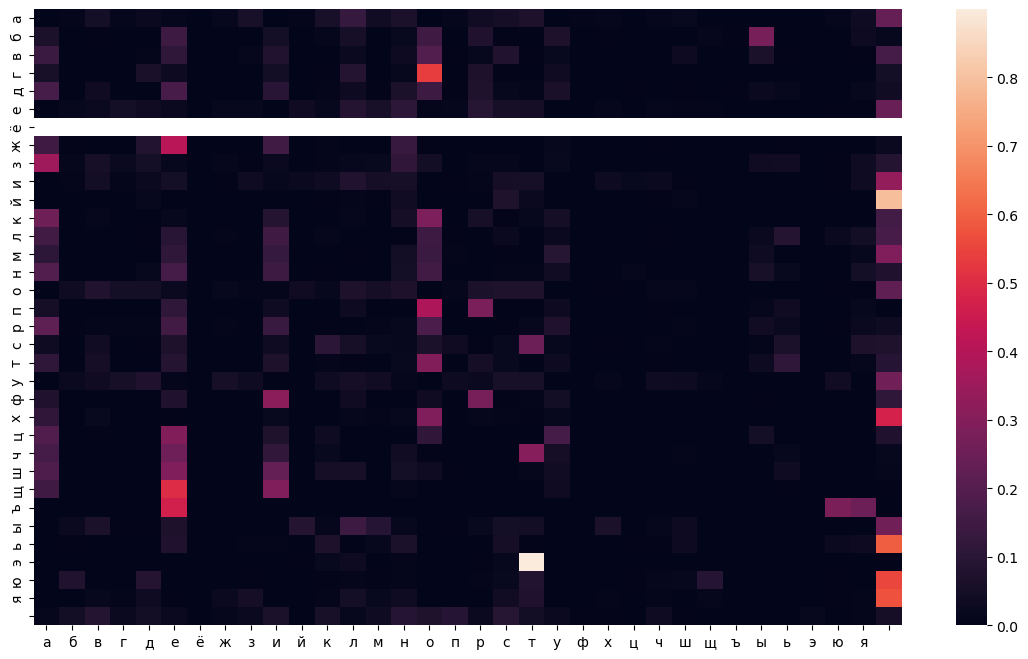

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Из карты видно, что буквы "ё" вообще нет в тексте, а таакже перехода с буквы "ь" на "т". Зато мы видим, что много букв связано с пробелом, особенно "и"

In [ ]:
start = POS['п']
end = POS['р']
prior = 1.0 / len(russian)

for c1 in russian:
    for c2 in russian:
        word = ''.join(['п', c1, c2, 'р'])
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(word, proba)


паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2096922701641117e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.840852058790128e-06
палр 5.041733535887118e-09
памр 1.0932411575779563e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.531903526415092e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.729406619036978e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.685575343020761e-10
пвер 5.0598785244545456e-09
пвжр 3.909391636356634e-15
пвзр 8.4859471992

In [ ]:
def generate_word(start_char, length, probabilities, russian):
    current_char = start_char
    generated_word = current_char
    for _ in range(length - 1):
        next_char = random.choices(russian, weights=probabilities[russian.index(current_char)])[0]
        generated_word += next_char
        current_char = next_char

    return generated_word

In [ ]:
start_char = 'б'
generated_word = generate_word(start_char, 8, probabilities, russian)
print(f'Сгенерированное слово: {generated_word}')

Сгенерированное слово: беровибъ


Сделаем прогноз с помощью HMM

In [5]:
trading = pd.read_csv('/content/weekly-closings-of-the-dowjones-.csv')['Close']

In [6]:
trading

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
        ...  
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Close, Length: 162, dtype: float64

In [7]:
values = trading.values.reshape(-1,1)
values

array([[ 890.19],
       [ 901.8 ],
       [ 888.51],
       [ 887.78],
       [ 858.43],
       [ 850.61],
       [ 856.02],
       [ 880.91],
       [ 908.15],
       [ 912.75],
       [ 911.  ],
       [ 908.22],
       [ 889.31],
       [ 893.98],
       [ 893.91],
       [ 874.85],
       [ 852.37],
       [ 839.  ],
       [ 840.39],
       [ 812.94],
       [ 810.67],
       [ 816.55],
       [ 859.59],
       [ 856.75],
       [ 873.8 ],
       [ 881.17],
       [ 890.2 ],
       [ 910.37],
       [ 906.68],
       [ 907.44],
       [ 906.38],
       [ 906.68],
       [ 917.59],
       [ 917.52],
       [ 922.79],
       [ 942.43],
       [ 939.87],
       [ 942.88],
       [ 942.28],
       [ 940.7 ],
       [ 962.6 ],
       [ 967.72],
       [ 963.8 ],
       [ 954.17],
       [ 941.23],
       [ 941.83],
       [ 961.54],
       [ 971.25],
       [ 961.39],
       [ 934.45],
       [ 945.06],
       [ 944.69],
       [ 929.03],
       [ 938.06],
       [ 922.26],
       [ 9

In [21]:
for n in range(1, 19):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582102
2 -820.6341361402448
3 -820.610738532696
4 -786.8832287777104
5 -781.5199226668944
6 -778.2620692579312
7 -736.6264047953899
8 -768.4291941070679
9 -724.4396457765545


10 -702.3799113001133
11 -732.1835053752058
12 -712.8312367728807


13 -690.8010639832966
14 -694.5304829712243


15 -691.4737594412468
16 -700.5139833353115


17 -662.1187106906327
18 -683.1583947758993


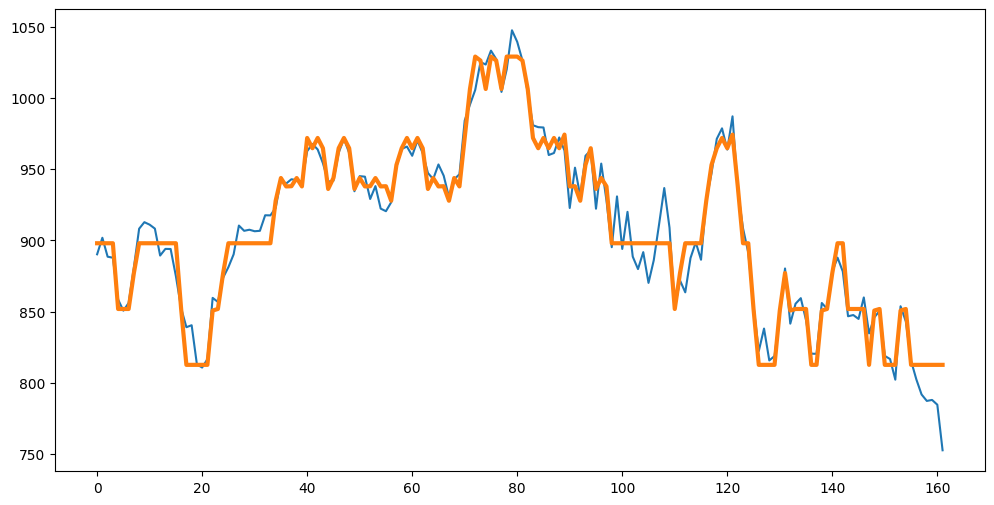

In [22]:
model = GaussianHMM(n_components=17,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Мы видим, что модель с 17 компонентами весьма неплохо описывает наш исходный временной ряд